In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
salary=pd.read_csv("C:\ExcelR\Data Scientist\Simple Linear Regression\Salary_data.csv")  #import dataset

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.shape

(30, 2)


# Perform EDA

In [5]:
salary.drop_duplicates()
salary[salary.duplicated()]        #check for dropped duplicates

,YearsExperience,Salary


In [6]:
salary1=salary.rename({'YearsExperience':'Exp'},axis=1)     #rename column

In [7]:
salary=salary1

In [8]:
salary

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
salary.info()        #check info to verify na values and correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exp     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Perform Linear Regression

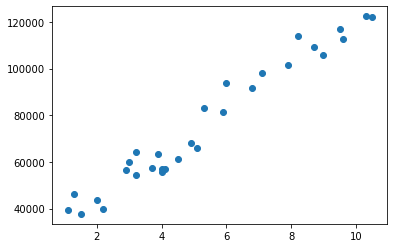

In [10]:
plt.scatter(salary.Exp,salary.Salary)

In [11]:
salary.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
import seaborn as sns

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exp', ylabel='Density'>

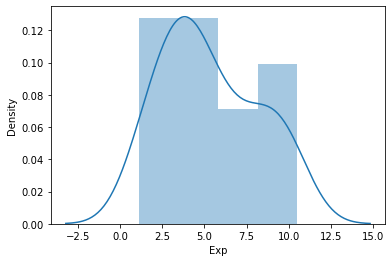

In [13]:
sns.distplot(salary['Exp'])

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

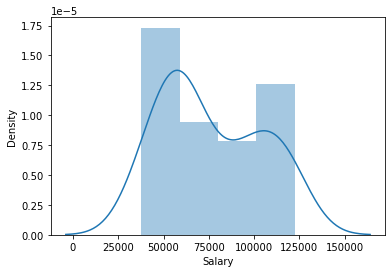

In [14]:
sns.distplot(salary['Salary'])

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols("Salary~Exp",data=salary).fit()

In [17]:
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [18]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

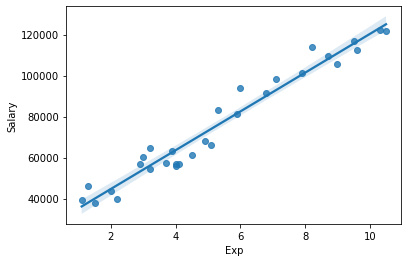

In [19]:
sns.regplot(x='Exp',y='Salary',data=salary)

# Model Prediction

In [20]:
newdata=pd.Series([1.1,2])

In [21]:
predi=pd.DataFrame(newdata,columns=['Exp'])

In [22]:
model.predict(predi)

0    36187.158752
1    44692.124842
dtype: float64

# Transformation

In [23]:
salary5=salary
salary5['Exp']=np.log(salary5.Exp)

In [24]:
model1=smf.ols("Salary~Exp",data=salary5).fit()

In [25]:
model1.params

Intercept    14927.97177
Exp          40581.98796
dtype: float64

In [26]:
model1.rsquared,model.rsquared_adj

(0.8538888828756969, 0.9554194021486339)

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

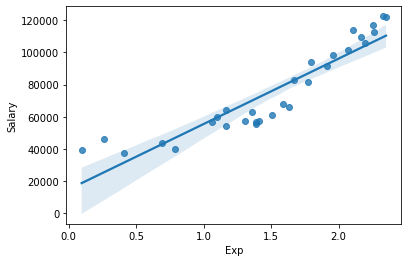

In [27]:
sns.regplot(x='Exp',y='Salary',data=salary5)

In [28]:
newdata1=pd.Series([1.1,2])

In [29]:
predi1=pd.DataFrame(newdata1,columns=['Exp'])

In [30]:
model1.predict(predi1)

0    59568.158526
1    96091.947690
dtype: float64